In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
training_data_path = pathlib.Path('/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Train')

In [4]:
os.listdir(training_data_path)

['Kidney_stone', 'Normal']

In [5]:
kidney_stone_path = pathlib.Path('/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Train/Kidney_stone')

In [6]:
stone_images_names = os.listdir(kidney_stone_path)

In [7]:
stone_images_path=[]
for image_name in stone_images_names:
  image_path = os.path.join(kidney_stone_path,image_name)
  stone_images_path.append(image_path)

In [8]:
normal_stone_path = pathlib.Path('/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Test/Normal')

In [9]:
normal_images_names = os.listdir(normal_stone_path)

In [10]:
normal_images_path=[]
for image_name in normal_images_names:
  image_path = os.path.join(normal_stone_path,image_name)
  normal_images_path.append(image_path)

In [11]:
training_images=[]
for image_name in stone_images_path:
  training_images.append(image_name)

In [12]:
for image_name in normal_images_path:
  training_images.append(image_name)

In [13]:
len(training_images)

811

In [14]:
training_images[0]

'/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Train/Kidney_stone/1.3.46.670589.33.1.63719516471829765900001.5211321358580615555.png'

In [15]:
from PIL import Image,ImageOps

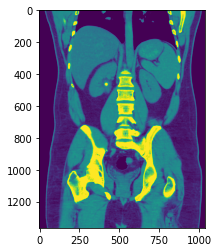

In [16]:

img = Image.open('/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Train/Kidney_stone/1.3.46.670589.33.1.63700700749865510700001.5062181202000819812.png')
plt.imshow(img)

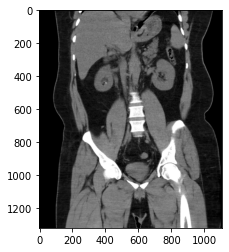

In [17]:
cls = training_images[222].split('/')[-2] #splitting  path
img=cv2.imread(training_images[0])
plt.imshow(img)

In [18]:
# Define  labels[], and data[]
labels = []  
training_data = []
classes = []
from tqdm import tqdm

for i in tqdm(range(len(training_images))):
       
    image = cv2.imread(training_images[i]) 
    image=cv2.resize(image, (224,224)) #resizing
    image=np.array(image)  #converting into numpy array
    image = image.astype('float32')
    image/=255 
    training_data.append(image)
    cls = training_images[i].split('/')[-2]
    
    if cls == 'Kidney_stone':
        lbl = 0
        classes.append('Kidney stone')
    else:
        lbl = 1
        classes.append('Normal')
    labels.append(lbl)

100%|██████████| 811/811 [08:40<00:00,  1.56it/s]


In [ ]:
training_data[0].shape

(224, 224, 3)

In [ ]:
labels=np.array(labels)
training_data=np.array(training_data)
print(labels.shape)
print(training_data.shape)

(811,)
(811, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


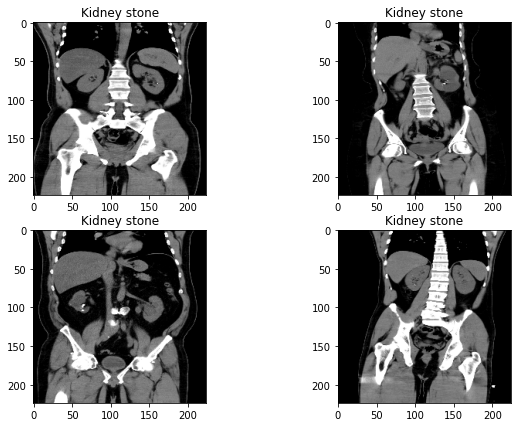

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
for i in range(1,5):
  fig.add_subplot(2, 2, i)
  plt.imshow(training_data[i])
  plt.title(classes[i])
  
  


In [ ]:
kidney_stone_path = pathlib.Path('/content/gdrive/MyDrive/Kideney stone detection(code-1)/Dataset/Test/Kidney_stone')

In [ ]:
stone_images_names = os.listdir(kidney_stone_path)

In [ ]:
stone_images_path=[]
for image_name in stone_images_names:
  image_path = os.path.join(kidney_stone_path,image_name)
  stone_images_path.append(image_path)

In [ ]:
normal_images_names = os.listdir(normal_stone_path)

In [ ]:
normal_images_path=[]
for image_name in normal_images_names:
  image_path = os.path.join(normal_stone_path,image_name)
  normal_images_path.append(image_path)

In [ ]:
testing_images=[]
for image_name in stone_images_path:
  testing_images.append(image_name)

In [ ]:
for image_name in normal_images_path:
  testing_images.append(image_name)

In [ ]:
len(testing_images)

346

In [ ]:
# Define  labels[], and data[]
testing_labels = []  
testing_data = []
testing_classes = []
from tqdm import tqdm

for i in tqdm(range(len(testing_images))):
       
    image = cv2.imread(testing_images[i]) 
    image=cv2.resize(image, (224,224)) #resizing
    image=np.array(image)  #converting into numpy array
    image = image.astype('float32')
    image/=255 
    testing_data.append(image)
    cls = testing_images[i].split('/')[-2]
    
    if cls == 'Kidney_stone':
        lbl = 0
        testing_classes.append('Kidney stone')
    else:
        lbl = 1
        testing_classes.append('Normal')
    testing_labels.append(lbl)

100%|██████████| 346/346 [00:07<00:00, 49.16it/s]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


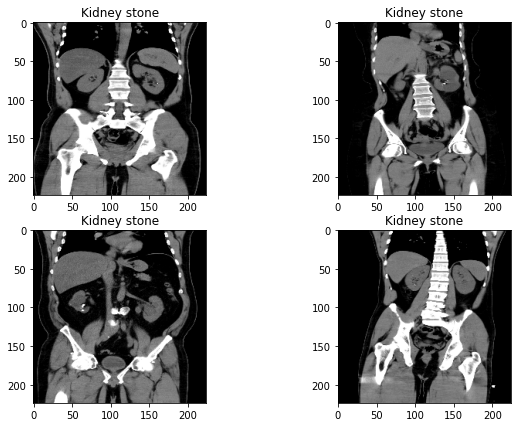

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
for i in range(1,5):
  fig.add_subplot(2, 2, i)
  plt.imshow(training_data[i],cmap='gray')
  plt.title(classes[i])
  
  


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(training_data,labels,test_size=0.2,random_state=22)

In [ ]:
import tensorflow as tf
import keras,os
from keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

In [ ]:
#applying data augumentation using ImageGenerator library provided in keras.preprocessing on training data
data_generator_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.2)
data_generator_val = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
y_val=tf.keras.utils.to_categorical(y_val,2)
y_train = tf.keras.utils.to_categorical(y_train,2)

In [ ]:
data_generator_train.fit(x_train)
data_generator_val.fit(x_val)

In [19]:
import tensorflow as tf
import keras,os
from keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

In [20]:
#building the model
model = Sequential()
# VGG19 conv base
base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

80150528/80134624 [==============================] - 3s 0us/step


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 26,447,682
Trainable params: 26,447,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(data_generator_train.flow(x_train,y_train , batch_size=20),validation_data=data_generator_train.flow(x_val,y_val,batch_size=20),epochs=30)

Epoch 1/30
33/33 [==============================] - 45s 1s/step - loss: 0.5653 - accuracy: 0.7593 - val_loss: 0.4988 - val_accuracy: 0.7975
Epoch 2/30
33/33 [==============================] - 27s 810ms/step - loss: 0.4957 - accuracy: 0.7716 - val_loss: 0.4540 - val_accuracy: 0.7975
Epoch 3/30
33/33 [==============================] - 27s 811ms/step - loss: 0.4073 - accuracy: 0.8025 - val_loss: 0.3391 - val_accuracy: 0.8160
Epoch 4/30
33/33 [==============================] - 27s 810ms/step - loss: 0.2546 - accuracy: 0.8812 - val_loss: 0.1672 - val_accuracy: 0.9202
Epoch 5/30
33/33 [==============================] - 27s 810ms/step - loss: 0.1594 - accuracy: 0.9367 - val_loss: 0.2122 - val_accuracy: 0.9080
Epoch 6/30
33/33 [==============================] - 27s 821ms/step - loss: 0.1881 - accuracy: 0.9105 - val_loss: 0.2294 - val_accuracy: 0.9202
Epoch 7/30
33/33 [==============================] - 27s 810ms/step - loss: 0.1022 - accuracy: 0.9645 - val_loss: 0.1597 - val_accuracy: 0.9387
Ep

In [ ]:
model.save('./model/Base_model.h5')

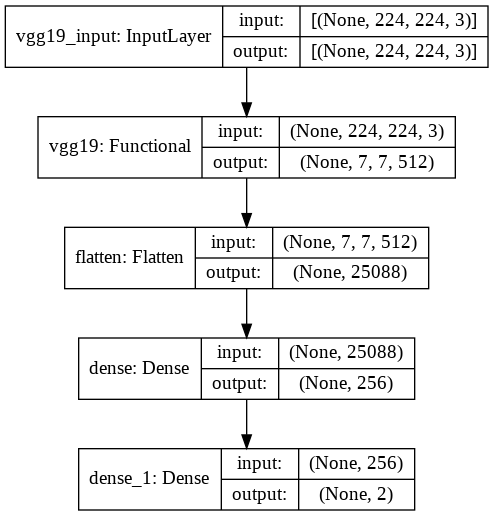

In [23]:
#plot the model
tf.keras.utils.plot_model(model, to_file='proposed_model.png', show_shapes=True, show_layer_names=True)

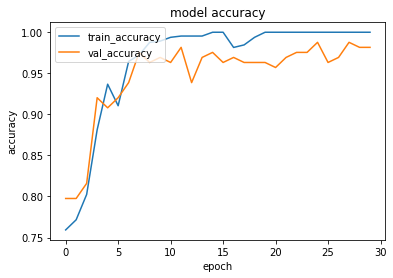

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

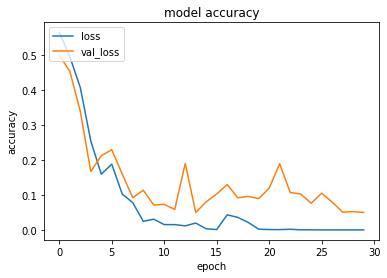

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(testing_data)

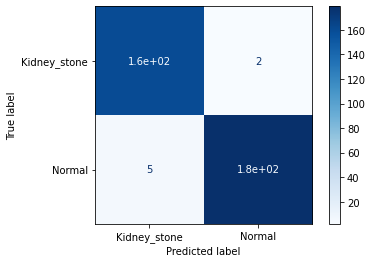

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
labels=['Kidney_stone', 'Normal']
cm = confusion_matrix(y_pred,testing_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
target_names = ['Kidney_stone','Normal']
print(classification_report(y_pred,testing_labels, target_names=target_names))

              precision    recall  f1-score   support

Kidney_stone       0.97      0.99      0.98       162
      Normal       0.99      0.97      0.98       184

    accuracy                           0.98       346
   macro avg       0.98      0.98      0.98       346
weighted avg       0.98      0.98      0.98       346

